In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

#### **TRATAMENTO DOS DADOS E SEPARAÇÃO ENTRE DADOS DE TREINAMENTO E TESTE**

In [ ]:
df_heart = pd.read_csv('/heart.csv')

# Renomeando os nomes das colunas
df_heart.rename(columns={
    'age': 'idade',
    'sex': 'sexo',
    'cp': 'tipo_de_angina',
    'trtbps': 'pressao_arterial_em_repouso',
    'chol': 'colesterol',
    'fbs': 'acucar_jejum',
    'restecg': 'eletrocardiograma',
    'thalachh': 'freq_cardiaca_max',
    'exng': 'angina_exercicio',
    'oldpeak': 'depressao_ST',
    'slp': 'inclinação_ST',
    'caa': 'numero_de_grandes_vasos',
    'thall': 'talassemia'
}, inplace=True)

df_heart.head()

,idade,sexo,tipo_de_angina,pressao_arterial_em_repouso,colesterol,acucar_jejum,eletrocardiograma,freq_cardiaca_max,angina_exercicio,depressao_ST,inclinação_ST,numero_de_grandes_vasos,talassemia,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
print(f"O dataset possui {df_heart.shape[0]} linhas e {df_heart.shape[1]} colunas.")

O dataset possui 303 linhas e 14 colunas.


##### **Quantidade de dados 0 = menor chance de ter ataque cardiáco e 1 = maior chance de ter um ataque cardiaco:**

In [ ]:
# Contar linhas onde output é igual a 0
count_zero = df_heart[df_heart['output'] == 0].shape[0]

# Contar linhas onde output é igual a 1
count_one = df_heart[df_heart['output'] == 1].shape[0]

print("Quantidade de linhas com output igual a 0:", count_zero)
print("Quantidade de linhas com output igual a 1:", count_one)


Quantidade de linhas com output igual a 0: 138
Quantidade de linhas com output igual a 1: 165


##### **Dados de Testes e Treinamento:**

In [ ]:
# Separar as features (X) e o target (y)
X = df_heart.drop(columns=['output'])
y = df_heart['output']

# Dividir o dataset em 80% para treinamento e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Exibir os tamanhos dos conjuntos de dados
print("Conjunto de treinamento:", X_train.shape, y_train.shape)
print("Conjunto de teste:", X_test.shape, y_test.shape)

Conjunto de treinamento: (242, 13) (242,)
Conjunto de teste: (61, 13) (61,)


### **ÁRVORE DE DECISÃO**

##### **Utilizando todos os 12 atributos na previsão:**

In [ ]:
X = df_heart.drop(columns=['output'])
y = df_heart['output']

# Dividir o dataset em 80% para treinamento e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Conjunto de teste: (61, 13) (61,)


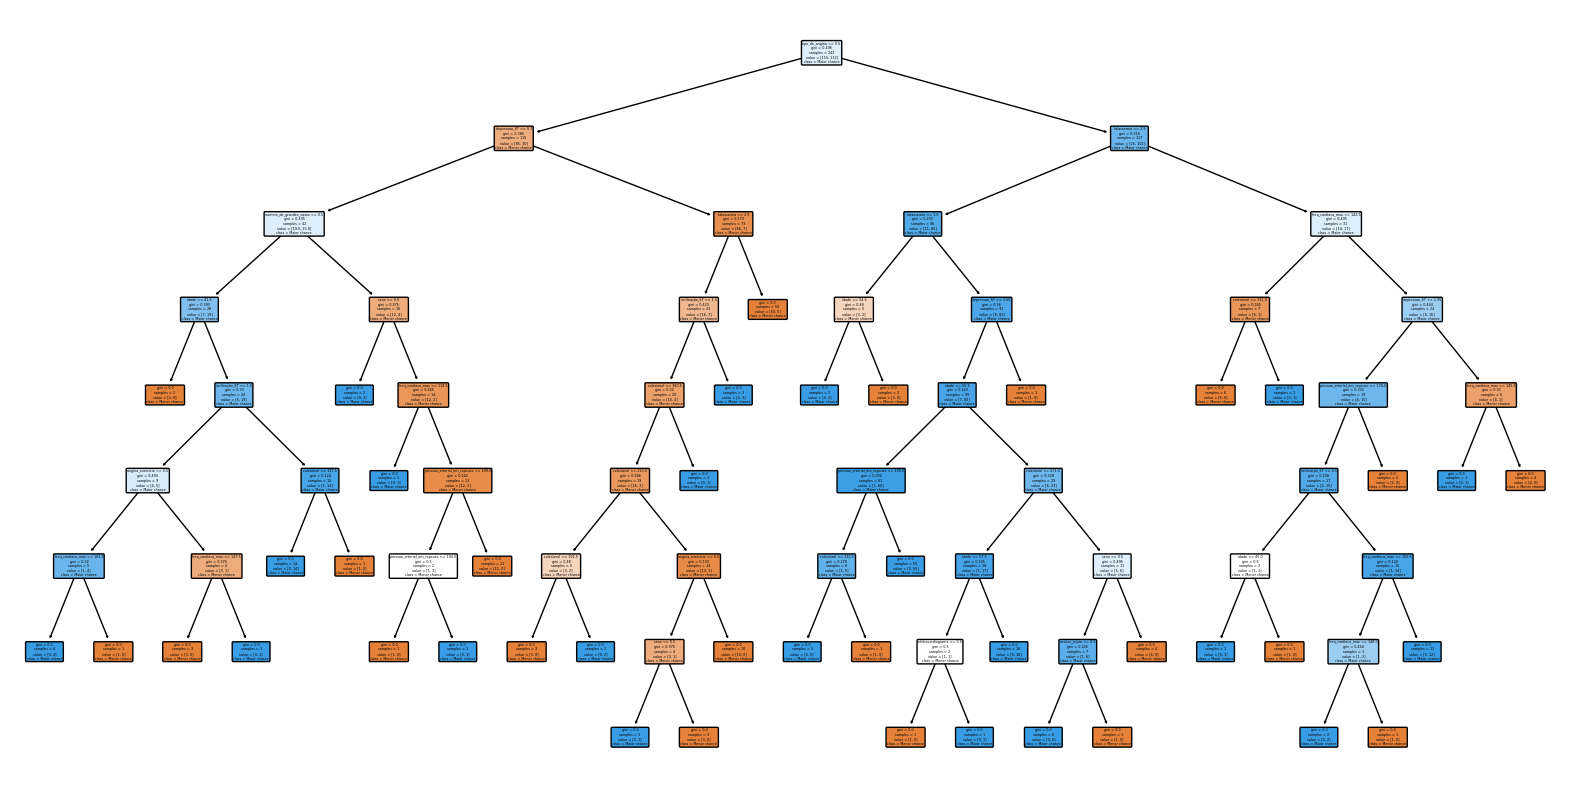

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=["Menor chance", "Maior chance"], filled=True, rounded=True)
plt.show()

In [ ]:
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))


                        Feature  Importance
2                tipo_de_angina    0.295789
9                  depressao_ST    0.127616
4                    colesterol    0.099702
7             freq_cardiaca_max    0.092691
12                   talassemia    0.089397
0                         idade    0.066914
1                          sexo    0.065097
10                inclinação_ST    0.046729
3   pressao_arterial_em_repouso    0.041109
11      numero_de_grandes_vasos    0.038156
5                  acucar_jejum    0.014286
8              angina_exercicio    0.014180
6             eletrocardiograma    0.008333


Com base nos valores de importância exibidos acima, as features mais relevantes são:

- **tipo_de_angina:** 0.295789
- **depressao_ST:** 0.127616
- **colesterol:** 0.099702
- **freq_cardiaca_max:** 0.092691
- **talassemia:** 0.089397

Essas variáveis possuem as maiores contribuições para o modelo.

##### **Utilizando 5 atributos na previsão:**

- **tipo_de_angina:** 0.295789
- **depressao_ST:** 0.127616
- **colesterol:** 0.099702
- **freq_cardiaca_max:** 0.092691
- **talassemia:** 0.089397

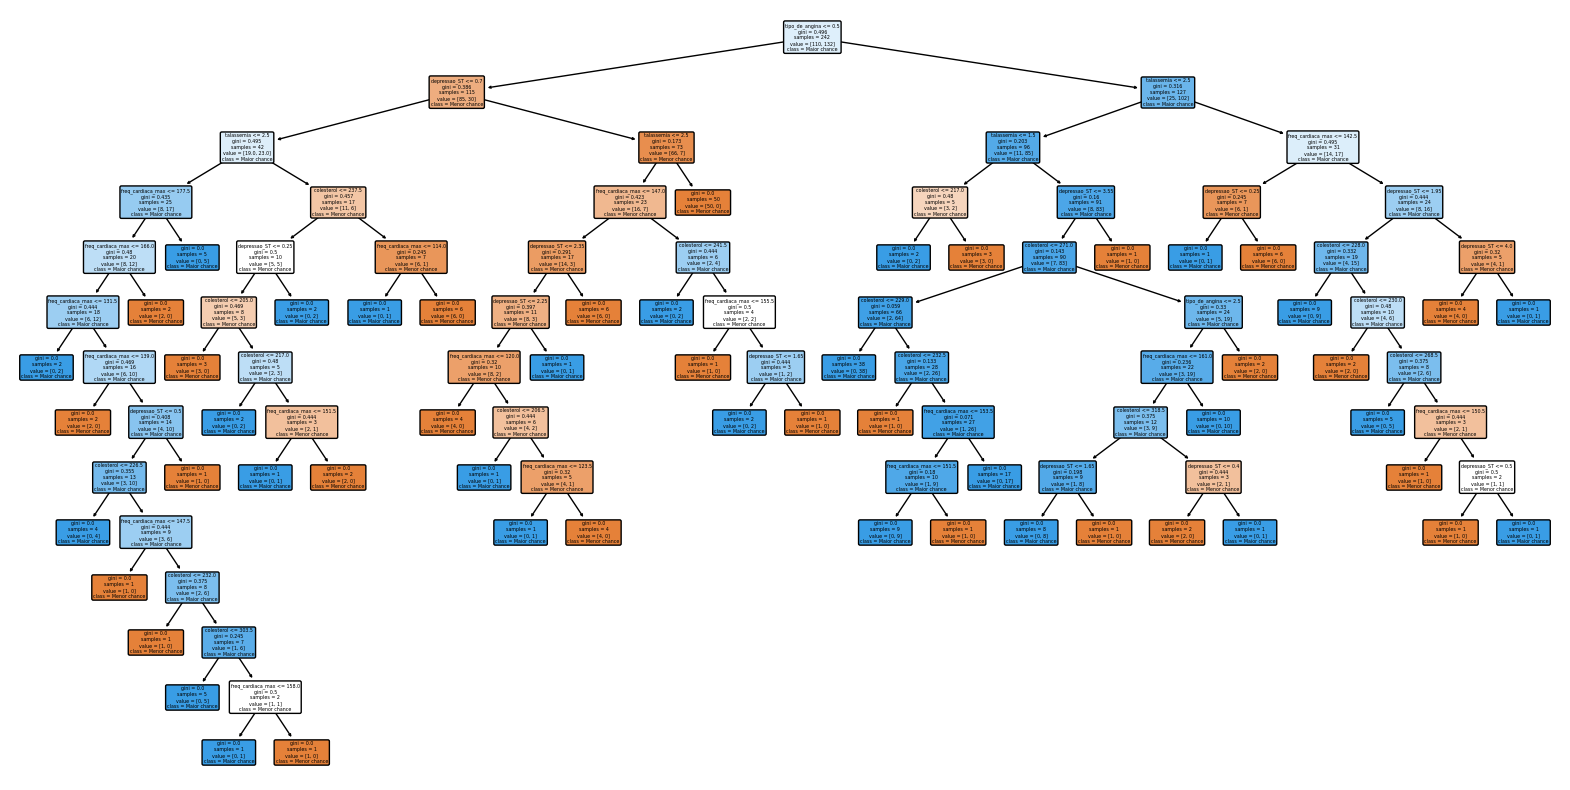

In [ ]:
features = ['tipo_de_angina', 'depressao_ST', 'colesterol', 'freq_cardiaca_max', 'talassemia']
X = df_heart[features]
y = df_heart['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

plt.figure(figsize=(20, 10))

plot_tree(decision_tree, feature_names=features, class_names=['Menor chance', 'Maior chance'], filled=True, rounded=True)
plt.show()


##### **Verificando a correlação em cada feature e fazendo a previsão com aquelas que foram indicadas como as mais relevantes:**

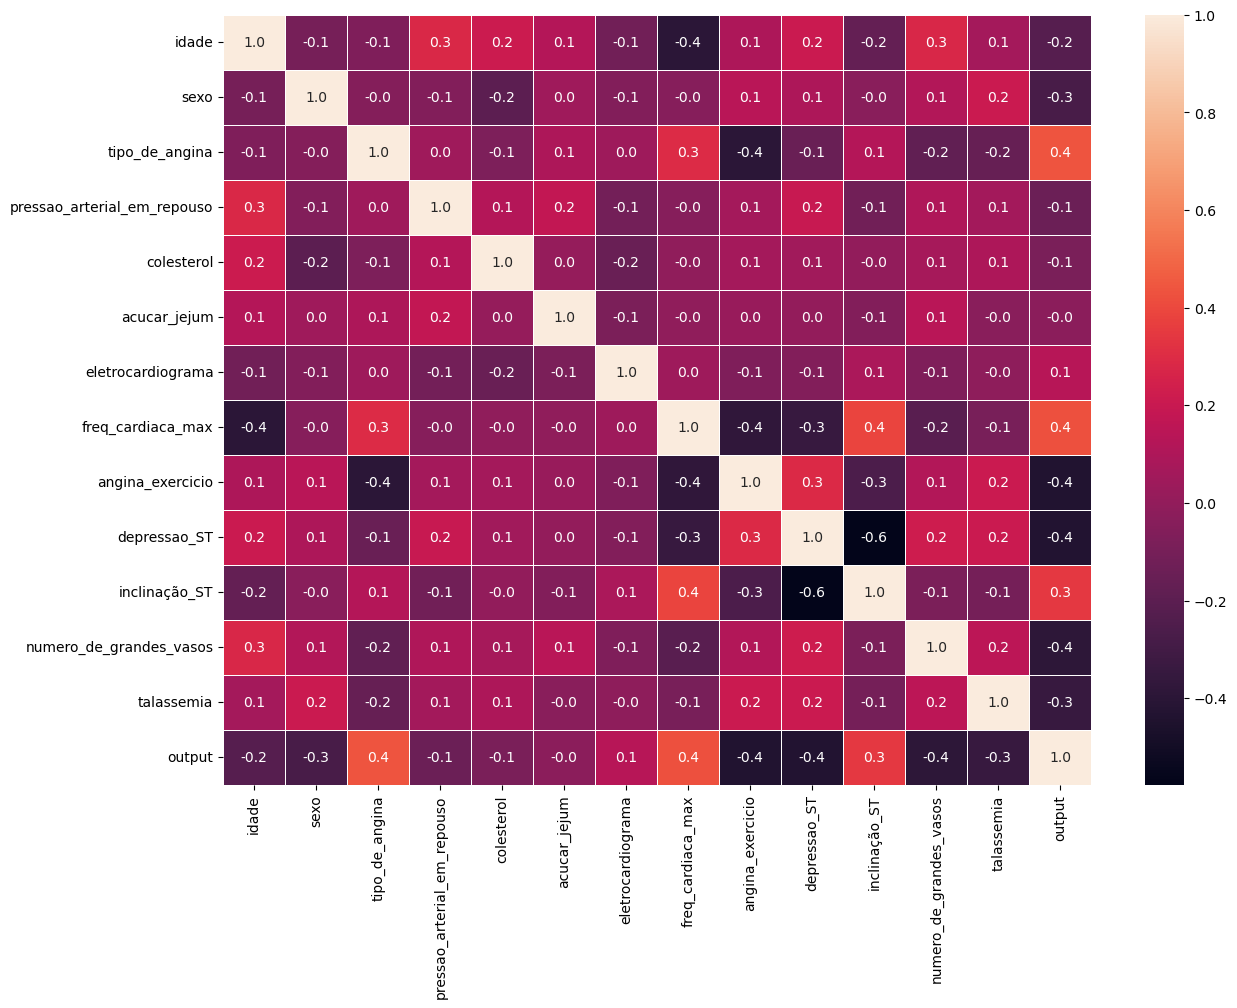

In [ ]:
plt.figure(figsize = (14,10))
sns.heatmap(df_heart.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

Este gráfico é uma matriz de correlação que mostra a relação entre diferentes variáveis em um conjunto de dados. Cada célula no mapa de calor representa o coeficiente de correlação entre duas variáveis, que varia de -1 a 1.

Interpretações:
- **Valores Próximos de 1:** Indica uma forte correlação positiva (quando uma variável aumenta, a outra também tende a aumentar).
- **Valores Próximos a -1:** Indica uma forte correlação negativa (quando uma variável aumenta, a outra tende a diminuir).
- **Valores Próximos a 0:** Indica pouca ou nenhuma correlação.

Com base na matriz de correlação exibida:

- **tipo_de_angina:** correlação de 0.4 com o "output".
- **depressao_ST:** correlação de 0.3 com o "output".
- **talassemia:** correlação de 0.5 com o "output".
- **numero_de_grandes_vasos:** correlação de 0.4 com o "output".

Essas variáveis apresentam as correlações mais significativas com o "output" e podem ser consideradas mais relevantes para a previsão.

In [ ]:
# Selecionar as colunas específicas para o modelo
X = df_heart[['tipo_de_angina', 'depressao_ST', 'talassemia', 'numero_de_grandes_vasos']]
y = df_heart['output']

# Dividir os dados em treinamento e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inicializar o modelo de árvore de decisão
model = DecisionTreeClassifier(random_state=42)

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

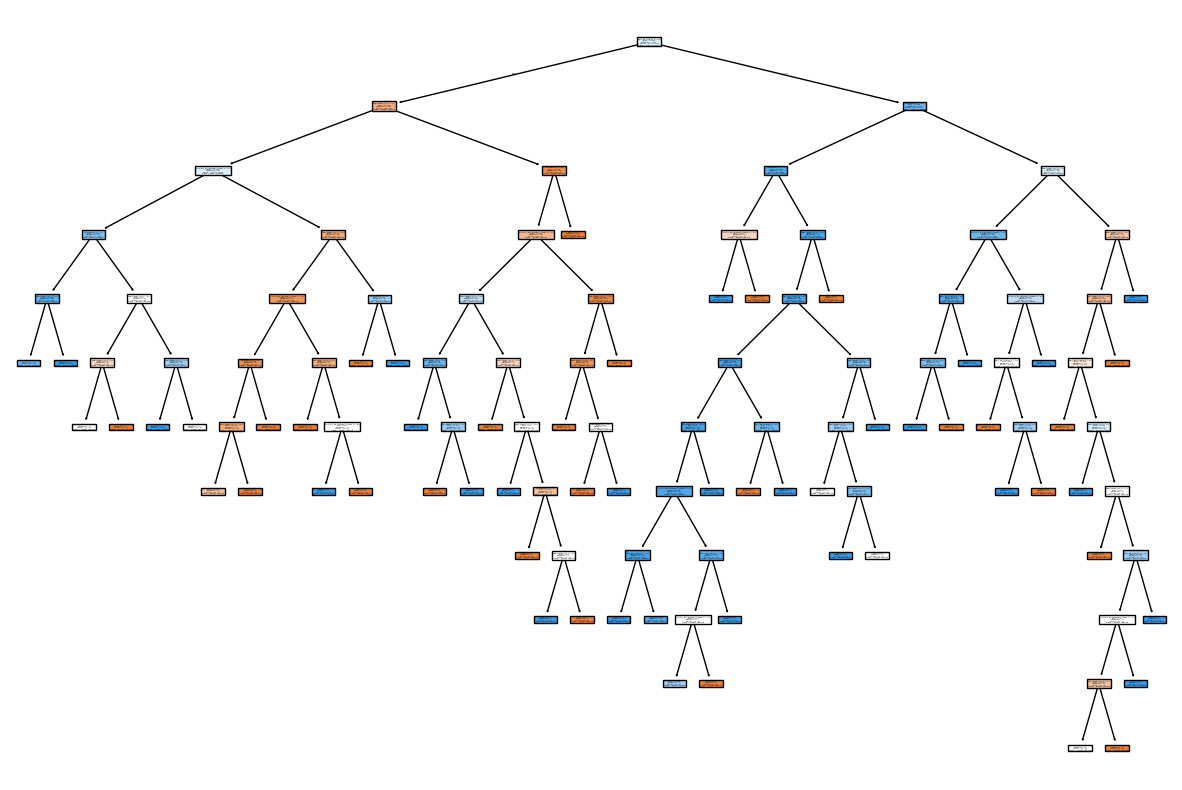

In [ ]:
# Configurar o tamanho da figura
plt.figure(figsize=(15, 10))

# Plotar a árvore de decisão treinada
plot_tree(model, feature_names=['tipo_de_angina', 'depressao_ST', 'talassemia', 'numero_de_grandes_vasos'],
          class_names=['Menor chance', 'Maior chance'], filled=True)

# Exibir o gráfico
plt.show()

### **Avaliar modelos gerados**

In [36]:
# Avaliação do modelo com várias métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {accuracy * 100:.2f}%")
print(f"Precisão: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

Acurácia: 75.41%
Precisão: 73.68%
Recall: 84.85%
F1 Score: 78.87%
